In [2]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.0


In [6]:
file = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/intersect/0002.vcf'

In [7]:
allel.vcf_to_hdf5(file,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/intersect/0002.h5',
                  fields='*', 
                  overwrite=True)

In [8]:
callset = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/intersect/0002.h5', mode='r')

In [10]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [11]:
callset = allel.read_vcf(file)
gt = allel.GenotypeArray(callset['calldata/GT'])
index = gt.n_samples
samps = callset['samples']

In [13]:
stats = np.ndarray(shape=(27,5), dtype=np.int32)
for i in range(0, index):
        stats.itemset((i, 0), i+1)
        print(str(i+1) + ': ' + str(samps[i]))
        stats.itemset((i, 1), gt[:,i].count_missing())
        stats.itemset((i, 2), gt[:,i].count_het())
        stats.itemset((i, 3), gt[:,i].count_hom_alt())
        stats.itemset((i, 4), gt[:,i].count_het() + gt[:,i].count_hom_alt())
        #print(str(toprint[0]) + '\t' + str(toprint[1]) + '\t' + str(toprint[2]) + '\t' + str(toprint[3]) + '\t' + str(toprint[4]))

1: 2012BM7F223_
2: 2012CM7F040P05_
3: 2012CM7F040P06_
4: 2012CM7F040P07_
5: 2012CM8F030P02_
6: 2012CM8F030P07_
7: 2012CM8F030P09_
8: 2012DM8F016P02_
9: 4R30C22acr626MN13_
10: 5R39C03Dr334cMN12_
11: FN0112228.06.02.01.M5_
12: FN0112885.02.06.03.M5_
13: FN0131633.06.01.M4_
14: FN0163764.04.01.M4_
15: FN0164160.03.02.01.01.M6_
16: FN0164472.x3.06.01.M5_
17: FN0170228.07.35.01.M5_
18: FN0170712.06.41.01.M5_
19: FN0171501.01.02.M4_
20: FN0172932.09.08.01.M5_
21: FN0173217.03.09.01.M5_
22: FN0175143.05.06.01.M5_
23: FN0175501.x2.02.01.M5_
24: FN0190069.01.01.M4_
25: R18C55Dhaar437MN13_
26: R52C55Dadr564MN13_
27: RP8DM5r597MN13_


In [14]:
print('\tSample\tMissing\tHet\tHom_Alt\tTot_Alt')
stats

	Sample	Missing	Het	Hom_Alt	Tot_Alt


array([[ 1,  3,  0, 14, 14],
       [ 2,  7,  0,  7,  7],
       [ 3, 14,  0,  5,  5],
       [ 4,  5,  0,  4,  4],
       [ 5,  8,  0,  8,  8],
       [ 6, 10,  0,  2,  2],
       [ 7,  2,  0,  3,  3],
       [ 8,  6,  0,  5,  5],
       [ 9, 14,  0,  6,  6],
       [10, 21,  0,  1,  1],
       [11, 16,  0,  8,  8],
       [12,  8,  0,  7,  7],
       [13, 12,  0, 11, 11],
       [14, 18,  0, 15, 15],
       [15, 12,  0,  6,  6],
       [16,  9,  0,  8,  8],
       [17,  8,  0,  6,  6],
       [18,  9,  0, 11, 11],
       [19, 10,  0,  2,  2],
       [20,  9,  0,  6,  6],
       [21,  9,  0,  5,  5],
       [22, 13,  0,  3,  3],
       [23,  9,  0, 10, 10],
       [24, 15,  0,  4,  4],
       [25, 12,  0,  2,  2],
       [26, 19,  0,  4,  4],
       [27, 18,  0, 10, 10]], dtype=int32)

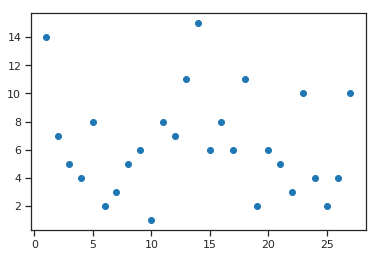

In [22]:
plt.scatter(stats[:,0], stats[:,4])